## **OpenAI Gym, PyBullet and PyBulletGym Installation**
[Click here to see Gym documentaion](https://gym.openai.com/docs/)

[Click here to see PyBullet documentaion](https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA)

[Click here to see PyBulletGym page](https://github.com/benelot/pybullet-gym)



**Before we start, first update the apt-get tool in the given machine.**

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [87.3 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [141 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http:

Most of the requirements of python packages are already fulfilled on Colab. To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.

In [2]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 84 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 2s (257 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 134448 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 84 not upgraded.
Need to get 784 kB of 

For rendering environment, you can use pyvirtualdisplay. So fulfill that

In [3]:
!pip install pyvirtualdisplay
!pip install piglet

     |████████████████████████████████| 71kB 2.4MB/s 
     |████████████████████████████████| 92kB 4.7MB/s 


**Newly added step: installing Atari!**

In [4]:
!pip install gym[atari]

In [5]:
!pip install pybullet==2.5.9

     |████████████████████████████████| 82.7MB 46kB/s 
  Created wheel for pybullet: filename=pybullet-2.5.9-cp36-cp36m-linux_x86_64.whl size=94374089 sha256=48eb2467c933f29be820060941a02d4f1cd0f62aaf6ab1c64c638a313a0aa752
  Stored in directory: /root/.cache/pip/wheels/e4/be/17/68e1fc91e1594bbc35330ae240f2c74dcce4219786729e034f
Successfully built pybullet


In [6]:
!git clone https://github.com/benelot/pybullet-gym.git

Cloning into 'pybullet-gym'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 735 (delta 3), reused 6 (delta 1), pack-reused 720
Receiving objects: 100% (735/735), 19.30 MiB | 8.15 MiB/s, done.
Resolving deltas: 100% (400/400), done.


In [7]:
cd /content/pybullet-gym/

/content/pybullet-gym


In [8]:
!pip install -e .

Obtaining file:///content/pybullet-gym
  Running setup.py develop for pybulletgym


Import everything.

In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import pybulletgym  # register PyBullet enviroments with open ai gym
import pybullet
import pybullet_data

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

# Colab comes with PyTorch
import torch
import torch.nn as nn
import torch.autograd as autograd
import collections
import itertools
from collections import deque

To activate virtual display, we need to run a script once for training an agent, as follows:

In [10]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

The following code creates a virtual display to draw game images on. If you are running locally, just ignore it.

In [0]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('/content/video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, '/content/video', force=True)
  return env

# **Test three environments that we are going to use.**
## Breakout

Breakout-ram-v0: belongs to  Atari, with discrete action space.

See what it looks like: https://gym.openai.com/envs/Breakout-ram-v0/

In [13]:
env = gym.make("Breakout-ram-v0")
print("env.action_space: ", env.action_space)

n_episode = 20    # number of episodes
max_steps = 1000   # maximum steps for each episode

# Iterate through all episodes
for i_episode in range(n_episode):
    observation = env.reset()

    # Iterate through all steps
    for t in range(max_steps):
        env.render()
        s = observation
        a = env.action_space.sample() # sample an action

        # One step
        observation, r, done, info = env.step(a) # s_prime: next observation, r: immediate reward, done: terminal state indicator
        s_prime = observation

        # Ends this episode if reaching a terminal state
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# should return a state vector if everything worked
env.reset()

env.action_space:  Discrete(4)
Episode finished after 162 timesteps
Episode finished after 400 timesteps
Episode finished after 182 timesteps
Episode finished after 352 timesteps
Episode finished after 173 timesteps
Episode finished after 307 timesteps
Episode finished after 219 timesteps
Episode finished after 175 timesteps
Episode finished after 172 timesteps
Episode finished after 174 timesteps
Episode finished after 179 timesteps
Episode finished after 182 timesteps
Episode finished after 228 timesteps
Episode finished after 168 timesteps
Episode finished after 368 timesteps
Episode finished after 255 timesteps
Episode finished after 226 timesteps
Episode finished after 282 timesteps
Episode finished after 251 timesteps
Episode finished after 185 timesteps


array([ 63,  63,  63,  63,  63,  63, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 192, 192, 192, 192, 192, 192, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 240,   0,   0,
       255,   0,   0, 240,   0,   5,   0,   0,   6,   0,  70, 182, 134,
       198,  22,  38,  54,  70,  88,   6, 146,   0,   8,   0,   0,   0,
         0,   0,   0, 241,   0, 242,   0, 242,  25, 241,   5, 242,   0,
         0, 255,   0, 228,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   8,   0, 255, 255, 255, 255, 255, 255, 255,
         0,   0,   5,   0,   0, 186, 214, 117, 246, 219, 242], dtype=uint8)

### Inverted Pendulum

InvertedPendulumMuJoCoEnv-v0: belongs to MuJoCo, with continuous action space. **Remember to discretize it when you go with an action.**

See what it looks like: https://gym.openai.com/envs/InvertedPendulum-v2/

In [15]:
#define the simulated environment we are going to use
env = gym.make("InvertedPendulumMuJoCoEnv-v0")
#check out the pacman action space!
print("env.action_space: ", env.action_space)

n_episode = 20    # number of episodes
max_steps = 1000   # maximum steps for each episode

# Iterate through all episodes
for i_episode in range(n_episode):
    observation = env.reset()

    # Iterate through all steps
    for t in range(max_steps):
        env.render()
        s = observation
        a = env.action_space.sample() # sample an action

        # One step
        observation, r, done, info = env.step(a) # s_prime: next observation, r: immediate reward, done: terminal state indicator
        s_prime = observation

        # Ends this episode if reaching a terminal state
        #if done[0] and done[1]:
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# should return a state vector if everything worked
env.reset()

env.action_space:  Box(1,)
options= 
Episode finished after 18 timesteps
Episode finished after 37 timesteps
Episode finished after 15 timesteps
Episode finished after 26 timesteps
Episode finished after 38 timesteps
Episode finished after 27 timesteps
Episode finished after 30 timesteps
Episode finished after 22 timesteps
Episode finished after 16 timesteps
Episode finished after 38 timesteps
Episode finished after 17 timesteps
Episode finished after 30 timesteps
Episode finished after 21 timesteps
Episode finished after 30 timesteps
Episode finished after 19 timesteps
Episode finished after 71 timesteps
Episode finished after 33 timesteps
Episode finished after 50 timesteps
Episode finished after 17 timesteps
Episode finished after 33 timesteps


array([[ 0.        , -0.08994314],
       [ 0.        ,  0.        ]])

### Half Cheetah

HalfCheetah-v2: belongs to MuJoCo, with continuous action space.  **Remember to discretize it when you go with an action.**

See what it looks like: https://gym.openai.com/envs/HalfCheetah-v2/

In [16]:
env = gym.make("HalfCheetahMuJoCoEnv-v0")
print("env.action_space: ", env.action_space)

n_episode = 20      # number of episodes
max_steps = 10001    # maximum steps for each episode

# Iterate through all episodes
for i_episode in range(n_episode):
    observation = env.reset()

    # Iterate through all steps
    for t in range(max_steps):
        env.render()
        s = observation
        a = env.action_space.sample() # sample an action

        # One step
        observation, r, done, info = env.step(a) # s_prime: next observation, r: immediate reward, done: terminal state indicator
        s_prime = observation

        # Ends this episode if reaching a terminal state
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# should return a state vector if everything worked
env.reset()

WalkerBase::__init__
env.action_space:  Box(6,)
options= 
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps


array([ 0.03383122, -0.00038106,  0.06911339,  0.02307902, -0.07323077,
        0.09348499,  0.07615632, -0.08504336,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ], dtype=float32)

# Implementation

In [0]:
class initNeuralNetwork(nn.Module): 

    def __init__(self, input, output):
        super(initNeuralNetwork, self).__init__()
        self.input = input
        self.output = output

        #Neural Network definition (passing inputs and output to train NN
        self.neuralNetwork = nn.Sequential(nn.Linear(self.input[0], 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, self.output))

    def forward(self, state):
        return self.neuralNetwork(state)

class BasicBuffer:  #creating buffer to be used as replay buffer for dqn

    def __init__(self, max_size):
        self.max_size = max_size
        self.buffer = collections.deque(maxlen=max_size)
        self.buffer = deque(maxlen=max_size)

    def push(self, state, action, reward, next_state, done): #Function used to push values in replay buffer
        experience = (state.reshape(-1), action, np.array([reward]), next_state.reshape(-1), done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
        done_batch = []

        batch = random.sample(self.buffer, batch_size) #Generating random samples

        for experience in batch: #Batch wise iteration for calculating next step action
            state, action, reward, next_state, done = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            done_batch.append(done)

        return (state_batch, action_batch, reward_batch, next_state_batch, done_batch)
      
    def __len__(self):  #Calculate length of buffer
      return len(self.buffer)

#### Q Learning

In [0]:
class Q_Learning_Agent:   #Q Learning 

    def __init__(self, env, bin_array, learning_rate=3e-4, gamma=0.99):
        self.env = env
        self.bin_array = bin_array
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.discretization = {}

        self.flag_discrete = not isinstance(env.action_space, gym.spaces.discrete.Discrete)  #Checking for discretization based on the flag
        if self.flag_discrete:
            num_actions = env.action_space.sample().shape[0]
        else:
            num_actions = env.action_space.n
        tmp1_list = [[*x] for x in list(itertools.product(*[list(range(len(self.bin_array) - 1)) for x in range(num_actions)]))]
        for i in range(len(tmp1_list)):
            self.discretization[i] = tmp1_list[i]

        if isinstance(env.action_space.sample(), int): #Checking for discrete flag and passign action space based on it i.e. either its continous or discrete space
            self.model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
        else:
            self.model = initNeuralNetwork(env.observation_space.sample().shape,
                             int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))

        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.L1_loss = nn.L1Loss() #Calculating loss

    def get_action(self, state, discretize=False, eps=0.20):  #Getting action for the state
        state = torch.FloatTensor(state.reshape(-1)).float().unsqueeze(0)
        qvals = self.model.forward(state)
        action = np.argmax(qvals.cpu().detach().numpy())

        if (np.random.randn() < eps): #Greedy epsilon policy
            tmp_action = self.env.action_space.sample()
            if discretize:
                tmp_action = np.digitize(tmp_action, self.bin_array) - 1 #Discretizing action space

            return tmp_action

        if discretize:
            action = np.array(self.discretization[action])

        return action

    def compute_loss(self, batch):  #Computing loss based on the state, next state, action i.e. using Q learning equation
        states, actions, rewards, next_states, dones = batch
        states = torch.FloatTensor(states.reshape(-1))
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        curr_Q = self.model.forward(states)[actions]
        next_Q = self.model.forward(next_states.reshape(-1))
        max_next_Q = torch.max(next_Q)
        expected_Q = rewards + self.gamma * max_next_Q

        loss = self.L1_loss(curr_Q, expected_Q)
        return loss

    def update(self, batch): #Update batch
        loss = self.compute_loss(batch)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


In [0]:
#Declaration of different environments
env1 = "Breakout-ram-v0"
env2 = "InvertedPendulumMuJoCoEnv-v0"
env3 = "HalfCheetahMuJoCoEnv-v0"
env4 = "CartPole-v0"


In [0]:
def train_q_learning(env, class_q_learning,n_episodes, max_steps): #Training q learning
    episode_rewards = []
    discrete_flag = not isinstance(env.action_space, gym.spaces.discrete.Discrete)
    for episode in range(n_episodes): #running for n_episodes
        state = env.reset()
        episode_cumulative_reward = 0
        for step in range(max_steps): #breaking for max steps achieved
            action = class_q_learning.get_action(state, discretize=discrete_flag)
            if discrete_flag:
                analog_action = []
                for bin in action:
                    analog_action.append(np.random.uniform(bining_array[bin],bining_array[bin+1],1)) #Converting discrete back to analog
                analog_action = [x[0] for x in analog_action]
                next_state, reward, done, _ = env.step(analog_action)
                class_q_learning.update((state, action[0], [reward], next_state, done)) #updating Q
            else:
                next_state, reward, done, _ = env.step(action)
                class_q_learning.update((state, action, [reward], next_state, done)) #updating Q
            episode_cumulative_reward += reward

            if done or step == max_steps-1: #breaking if done or max_steps achieved
                episode_rewards.append(episode_cumulative_reward)
                print("Episode " + str(episode) + ": " + str(episode_cumulative_reward))
                break

            state = next_state

    return episode_rewards

In [0]:
def plot(env_name,episode_rewards): #Function to plot cumulative rewards and episodes
  plt.plot(list(range(1,len(episode_rewards)+1)),episode_rewards)
  plt.ylabel("Cumulative Rewards")
  plt.xlabel("Episodes")
  plt.title(env_name)



In [0]:
n_episodes = 100
max_steps = 1000
bining_array = [-1.0, 0.0, 1.0] #bining for discreization
batch_size=32
target_update_rate = 3

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Episode 0: 1.0
Episode 1: 0.0
Episode 2: 1.0
Episode 3: 1.0
Episode 4: 1.0
Episode 5: 0.0
Episode 6: 0.0
Episode 7: 1.0
Episode 8: 2.0
Episode 9: 0.0
Episode 10: 0.0
Episode 11: 0.0
Episode 12: 0.0
Episode 13: 3.0
Episode 14: 1.0
Episode 15: 3.0
Episode 16: 1.0
Episode 17: 3.0
Episode 18: 2.0
Episode 19: 0.0
Episode 20: 3.0
Episode 21: 1.0
Episode 22: 3.0
Episode 23: 0.0
Episode 24: 3.0
Episode 25: 0.0
Episode 26: 3.0
Episode 27: 1.0
Episode 28: 2.0
Episode 29: 1.0
Episode 30: 2.0
Episode 31: 0.0
Episode 32: 3.0
Episode 33: 1.0
Episode 34: 0.0
Episode 35: 2.0
Episode 36: 1.0
Episode 37: 1.0
Episode 38: 2.0
Episode 39: 4.0
Episode 40: 0.0
Episode 41: 2.0
Episode 42: 0.0
Episode 43: 1.0
Episode 44: 3.0
Episode 45: 0.0
Episode 46: 1.0
Episode 47: 3.0
Episode 48: 1.0
Episode 49: 1.0
Episode 50: 0.0
Episode 51: 4.0
Episode 52: 0.0
Episode 53: 0.0
Episode 54: 2.0
Episode 55: 2.0
Episode 56: 1.0
Episode 57: 0.0
Episode 58: 2.0
Episode 59: 2.0
Episode 60: 0.0
Episode 61: 1.0
Episode 62: 3.0
Ep

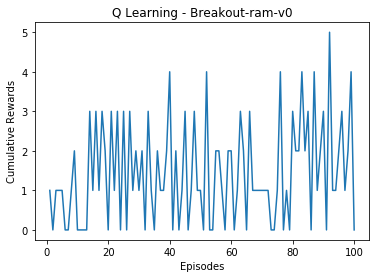

In [69]:
#Q learning on Breakout environment
env=gym.make(env1)
episode_rewards = train_q_learning(env, Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - Breakout-ram-v0",episode_rewards)

Box(4,)
options= 
Episode 0: 30.0
Episode 1: 59.0


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Episode 2: 21.0
Episode 3: 24.0
Episode 4: 23.0
Episode 5: 13.0
Episode 6: 30.0
Episode 7: 19.0
Episode 8: 27.0
Episode 9: 35.0
Episode 10: 60.0
Episode 11: 22.0
Episode 12: 37.0
Episode 13: 15.0
Episode 14: 40.0
Episode 15: 30.0
Episode 16: 11.0
Episode 17: 16.0
Episode 18: 13.0
Episode 19: 27.0
Episode 20: 15.0
Episode 21: 22.0
Episode 22: 26.0
Episode 23: 30.0
Episode 24: 16.0
Episode 25: 16.0
Episode 26: 70.0
Episode 27: 17.0
Episode 28: 22.0
Episode 29: 17.0
Episode 30: 46.0
Episode 31: 30.0
Episode 32: 21.0
Episode 33: 28.0
Episode 34: 21.0
Episode 35: 46.0
Episode 36: 12.0
Episode 37: 18.0
Episode 38: 25.0
Episode 39: 25.0
Episode 40: 66.0
Episode 41: 19.0
Episode 42: 24.0
Episode 43: 37.0
Episode 44: 56.0
Episode 45: 26.0
Episode 46: 58.0
Episode 47: 23.0
Episode 48: 25.0
Episode 49: 41.0
Episode 50: 37.0
Episode 51: 23.0
Episode 52: 28.0
Episode 53: 17.0
Episode 54: 56.0
Episode 55: 30.0
Episode 56: 29.0
Episode 57: 30.0
Episode 58: 25.0
Episode 59: 16.0
Episode 60: 37.0
Episo

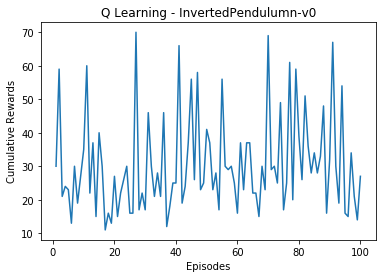

In [52]:
#Q learning on Inverted Pendulumn environment
env=gym.make(env2)
print(env.observation_space)
episode_rewards = train_q_learning(env, Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - InvertedPendulumn-v0",episode_rewards)

WalkerBase::__init__
Box(17,)
options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Episode 0: -250.66192164583666
Episode 1: -234.05672246596447
Episode 2: -224.39394615474856
Episode 3: -244.71821829055187
Episode 4: -289.5718061110973
Episode 5: -286.13108537336103
Episode 6: -321.25492314054986
Episode 7: -178.3113981257755
Episode 8: -161.24219754768345
Episode 9: -300.8818888333032
Episode 10: -149.54136524560593
Episode 11: -163.47037841444745
Episode 12: -162.1282273080038
Episode 13: -164.90684079799803
Episode 14: -156.50208074556144
Episode 15: -289.4624361247448
Episode 16: -292.73879622410044
Episode 17: -144.35934383211173
Episode 18: -112.8353408789539
Episode 19: -167.04238025241494
Episode 20: -138.5835989584632
Episode 21: -256.85414177071715
Episode 22: -140.07896424069082
Episode 23: -165.89389801771821
Episode 24: -311.62403973157495
Episode 25: -165.2255695480981
Episode 26: -164.72311047688527
Episode 27: -152.61327402659307
Episode 28: -179.57900280147888
Episode 29: -139.01522648394237
Episode 30: -305.61813332576736
Episode 31: -192.096986694

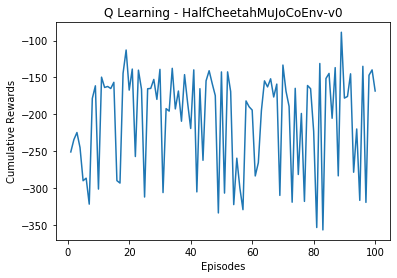

In [53]:
#Q learning on Half Cheetah environment
env=gym.make(env3)
print(env.observation_space)
episode_rewards = train_q_learning(env, Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - HalfCheetahMuJoCoEnv-v0",episode_rewards)

# Fitted Q

In [0]:
class Fitted_Q_Learning_Agent: #Fitted Q Learning

    def __init__(self, env, bin_array, learning_rate=3e-4, gamma=0.99):
        self.env = env
        self.bin_array = bin_array
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.discretization = {}

        self.flag_discrete = not isinstance(env.action_space, gym.spaces.discrete.Discrete)  #Checking for discretization based on the flag
        if self.flag_discrete:
            num_actions = env.action_space.sample().shape[0]
        else:
            num_actions = env.action_space.n
        tmp1_list = [[*x] for x in list(itertools.product(*[list(range(len(self.bin_array) - 1)) for x in range(num_actions)]))]
        for i in range(len(tmp1_list)):
            self.discretization[i] = tmp1_list[i]

        if isinstance(env.action_space.sample(), int):
            self.model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
        else:
            self.model = initNeuralNetwork(env.observation_space.sample().shape,
                             int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))

        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.MSE_loss = nn.MSELoss()

    def get_action(self, state, discretize=False, eps=0.20):
        state = torch.FloatTensor(state.reshape(-1)).float().unsqueeze(0)
        qvals = self.model.forward(state)
        action = np.argmax(qvals.cpu().detach().numpy())

        if (np.random.randn() < eps):
            tmp_action = self.env.action_space.sample()
            if discretize:
                tmp_action = np.digitize(tmp_action, self.bin_array) - 1

            return tmp_action

        if discretize:
            action = np.array(self.discretization[action])

        return action

    def compute_loss(self, batch):
        states, actions, rewards, next_states, dones = batch
        states = torch.FloatTensor(states.reshape(-1))
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        curr_Q = self.model.forward(states)[actions]
        next_Q = self.model.forward(next_states.reshape(-1))
        max_next_Q = torch.max(next_Q)
        expected_Q = rewards + self.gamma * max_next_Q

        loss = 0.5 * self.MSE_loss(curr_Q, expected_Q)
        return loss

    def update(self, batch):
        loss = self.compute_loss(batch)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


Episode 0: 1.0
Episode 1: 1.0
Episode 2: 1.0
Episode 3: 0.0
Episode 4: 1.0
Episode 5: 0.0
Episode 6: 2.0
Episode 7: 2.0
Episode 8: 4.0
Episode 9: 4.0
Episode 10: 1.0
Episode 11: 0.0
Episode 12: 1.0
Episode 13: 1.0
Episode 14: 1.0
Episode 15: 0.0
Episode 16: 3.0
Episode 17: 2.0
Episode 18: 1.0
Episode 19: 2.0
Episode 20: 2.0
Episode 21: 2.0
Episode 22: 1.0
Episode 23: 0.0
Episode 24: 1.0
Episode 25: 0.0
Episode 26: 0.0
Episode 27: 1.0
Episode 28: 1.0
Episode 29: 1.0
Episode 30: 1.0
Episode 31: 1.0
Episode 32: 0.0
Episode 33: 2.0
Episode 34: 2.0
Episode 35: 0.0
Episode 36: 1.0
Episode 37: 0.0
Episode 38: 2.0
Episode 39: 2.0
Episode 40: 1.0
Episode 41: 1.0
Episode 42: 0.0
Episode 43: 1.0
Episode 44: 1.0
Episode 45: 3.0
Episode 46: 1.0
Episode 47: 3.0
Episode 48: 0.0
Episode 49: 0.0
Episode 50: 4.0
Episode 51: 0.0
Episode 52: 2.0
Episode 53: 1.0
Episode 54: 1.0
Episode 55: 2.0
Episode 56: 2.0
Episode 57: 1.0
Episode 58: 3.0
Episode 59: 4.0
Episode 60: 0.0
Episode 61: 1.0
Episode 62: 2.0
Ep

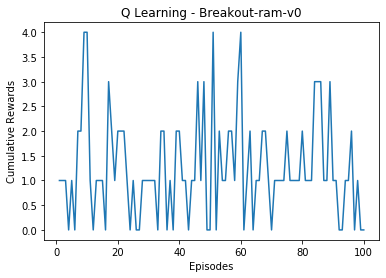

In [63]:
#Fitted Q learning on Breakout environment
env=gym.make(env1)
episode_rewards = train_q_learning(env, Fitted_Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - Breakout-ram-v0",episode_rewards)

options= 
Episode 0: 21.0
Episode 1: 24.0
Episode 2: 38.0


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Episode 3: 20.0
Episode 4: 27.0
Episode 5: 17.0
Episode 6: 23.0
Episode 7: 40.0
Episode 8: 74.0
Episode 9: 31.0
Episode 10: 40.0
Episode 11: 16.0
Episode 12: 16.0
Episode 13: 44.0
Episode 14: 25.0
Episode 15: 47.0
Episode 16: 14.0
Episode 17: 50.0
Episode 18: 31.0
Episode 19: 17.0
Episode 20: 23.0
Episode 21: 39.0
Episode 22: 35.0
Episode 23: 44.0
Episode 24: 36.0
Episode 25: 26.0
Episode 26: 28.0
Episode 27: 16.0
Episode 28: 63.0
Episode 29: 18.0
Episode 30: 19.0
Episode 31: 26.0
Episode 32: 19.0
Episode 33: 24.0
Episode 34: 19.0
Episode 35: 15.0
Episode 36: 23.0
Episode 37: 19.0
Episode 38: 39.0
Episode 39: 49.0
Episode 40: 22.0
Episode 41: 19.0
Episode 42: 28.0
Episode 43: 22.0
Episode 44: 46.0
Episode 45: 30.0
Episode 46: 32.0
Episode 47: 16.0
Episode 48: 21.0
Episode 49: 47.0
Episode 50: 20.0
Episode 51: 30.0
Episode 52: 16.0
Episode 53: 21.0
Episode 54: 33.0
Episode 55: 19.0
Episode 56: 25.0
Episode 57: 36.0
Episode 58: 17.0
Episode 59: 27.0
Episode 60: 27.0
Episode 61: 25.0
Epis

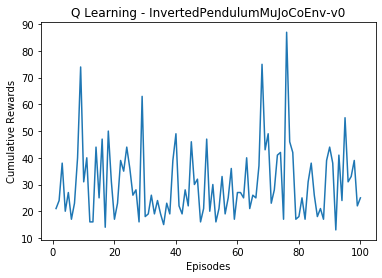

In [57]:
#Fitted Q learning on Inverted Pendulum environment
env=gym.make(env2)
episode_rewards = train_q_learning(env, Fitted_Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - InvertedPendulumMuJoCoEnv-v0",episode_rewards)

WalkerBase::__init__
options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Episode 0: -310.1276231380483
Episode 1: -272.5649412462542
Episode 2: -267.441970145528
Episode 3: -272.47291836338223
Episode 4: -233.02458149765803
Episode 5: -254.94622905556437
Episode 6: -252.9252391043333
Episode 7: -212.11825233968605
Episode 8: -273.1756127350164
Episode 9: -250.68331369745914
Episode 10: -243.5117143742284
Episode 11: -236.791547599334
Episode 12: -206.36645511836377
Episode 13: -250.31665528779303
Episode 14: -244.02555804248965
Episode 15: -177.7902284560413
Episode 16: -270.99796230399255
Episode 17: -258.7135240985278
Episode 18: -255.71322911900123
Episode 19: -233.89205247575353
Episode 20: -239.61556595141377
Episode 21: -197.30711283512466
Episode 22: -201.8637127160299
Episode 23: -239.8163161517775
Episode 24: -228.71932656317261
Episode 25: -272.8816039897255
Episode 26: -248.56189946682608
Episode 27: -240.18725239911205
Episode 28: -221.33558251062104
Episode 29: -252.69675898412206
Episode 30: -257.6765713614975
Episode 31: -193.29479992335374
E

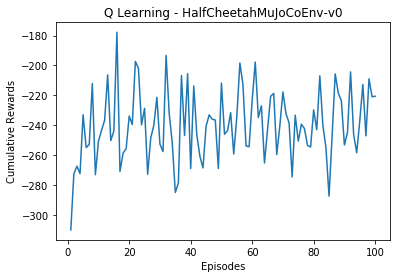

In [58]:
#Fitted Q learning on Half Cheetah environment
env=gym.make(env3)
episode_rewards = train_q_learning(env, Fitted_Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - HalfCheetahMuJoCoEnv-v0",episode_rewards)

# DQN

In [0]:
class DQN_Agent:  #Implementation of DQN

    def __init__(self, env, bin_array, learning_rate=3e-4, gamma=0.99,buffer_size=10000):
        self.env = env
        self.bin_array = bin_array
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.replay_buffer = BasicBuffer(max_size=buffer_size)
        self.discretization = {}

        self.flag_discrete = not isinstance(env.action_space, gym.spaces.discrete.Discrete)  # Checking for discretization based on the flag
        if self.flag_discrete:
            num_actions = env.action_space.sample().shape[0]
        else:
            num_actions = env.action_space.n
        tmp1_list = [[*x] for x in list(itertools.product(*[list(range(len(self.bin_array) - 1)) for x in range(num_actions)]))]
        for i in range(len(tmp1_list)):
            self.discretization[i] = tmp1_list[i]

        if isinstance(env.action_space.sample(), int):
            self.model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
            self.target_model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
        else:
            self.model = initNeuralNetwork(env.observation_space.sample().shape,
                             int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))
            self.target_model = initNeuralNetwork(env.observation_space.sample().shape,
                                    int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))

        self.target_model.load_state_dict(self.model.state_dict())
        self.target_model.eval()

        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.L1_loss = nn.L1Loss()

    def get_action(self, state, discretize=False, eps=0.20):
        state = torch.FloatTensor(state.reshape(-1)).float().unsqueeze(0)
        qvals = self.model.forward(state)
        action = np.argmax(qvals.cpu().detach().numpy())

        if (np.random.randn() < eps):
            tmp_action = self.env.action_space.sample()
            if discretize:
                tmp_action = np.digitize(tmp_action, self.bin_array) - 1

            return tmp_action

        if discretize:
            action = np.array(self.discretization[action])

        return action

    def compute_loss(self, batch):
        states, actions, rewards, next_states, dones = batch
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)
        curr_Q = self.model.forward(states).gather(1, actions.unsqueeze(1))
        curr_Q = curr_Q.squeeze(1)
        next_Q = self.target_model.forward(next_states)

        max_next_Q = torch.max(next_Q, 1)[0]
        expected_Q = rewards.squeeze(1) + self.gamma * max_next_Q

        loss = self.L1_loss(curr_Q, expected_Q)
        return loss

    def update(self, batch_size):
        batch = self.replay_buffer.sample(batch_size)
        loss = self.compute_loss(batch)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target(self):
        self.target_model.load_state_dict(self.model.state_dict())



In [0]:
def train_dqn_learning(env, class_dqn, n_episodes, max_steps, batch_size):
    episode_rewards = []
    discretize_flag = not isinstance(env.action_space, gym.spaces.discrete.Discrete)
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        for step in range(max_steps):
            action = class_dqn.get_action(state, discretize=discretize_flag)

            if discretize_flag:
                analog_action = []
                for bin in action:
                    analog_action.append(np.random.uniform(bining_array[bin],bining_array[bin+1],1))

                analog_action = [x[0] for x in analog_action]
                next_state, reward, done, _ = env.step(analog_action)
                class_dqn.replay_buffer.push(state, action[0], reward, next_state, done)
            else:
                next_state, reward, done, _ = env.step(action)
                class_dqn.replay_buffer.push(state, action, reward, next_state, done)
            episode_reward += reward

            if len(class_dqn.replay_buffer) > batch_size:
                class_dqn.update(batch_size)

            if done or step == max_steps-1:
                episode_rewards.append(episode_reward)
                print("Episode " + str(episode) + ": " + str(episode_reward))
                break

            state = next_state
        
        if episode % target_update_rate == 0:
            class_dqn.update_target()

    return episode_rewards


Episode 0: 1.0
Episode 1: 1.0
Episode 2: 1.0
Episode 3: 1.0
Episode 4: 2.0
Episode 5: 0.0
Episode 6: 0.0
Episode 7: 2.0
Episode 8: 0.0
Episode 9: 0.0
Episode 10: 0.0
Episode 11: 1.0
Episode 12: 0.0
Episode 13: 2.0
Episode 14: 1.0
Episode 15: 1.0
Episode 16: 1.0
Episode 17: 1.0
Episode 18: 2.0
Episode 19: 0.0
Episode 20: 2.0
Episode 21: 3.0
Episode 22: 2.0
Episode 23: 2.0
Episode 24: 1.0
Episode 25: 1.0
Episode 26: 3.0
Episode 27: 5.0
Episode 28: 1.0
Episode 29: 1.0
Episode 30: 0.0
Episode 31: 1.0
Episode 32: 2.0
Episode 33: 0.0
Episode 34: 1.0
Episode 35: 1.0
Episode 36: 1.0
Episode 37: 1.0
Episode 38: 2.0
Episode 39: 1.0
Episode 40: 1.0
Episode 41: 0.0
Episode 42: 0.0
Episode 43: 0.0
Episode 44: 1.0
Episode 45: 0.0
Episode 46: 2.0
Episode 47: 2.0
Episode 48: 1.0
Episode 49: 2.0
Episode 50: 1.0
Episode 51: 1.0
Episode 52: 2.0
Episode 53: 1.0
Episode 54: 2.0
Episode 55: 2.0
Episode 56: 3.0
Episode 57: 0.0
Episode 58: 0.0
Episode 59: 2.0
Episode 60: 0.0
Episode 61: 1.0
Episode 62: 0.0
Ep

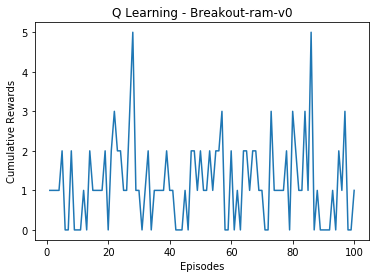

In [87]:
env=gym.make(env1)
episode_rewards = train_dqn_learning(env, DQN_Agent(env, bining_array), n_episodes, max_steps, batch_size)
print(episode_rewards)
plot("Q Learning - Breakout-ram-v0",episode_rewards)


options= 
Episode 0: 20.0
Episode 1: 47.0
Episode 2: 29.0
Episode 3: 49.0
Episode 4: 24.0
Episode 5: 18.0
Episode 6: 16.0
Episode 7: 17.0
Episode 8: 13.0
Episode 9: 15.0
Episode 10: 21.0
Episode 11: 19.0
Episode 12: 26.0
Episode 13: 16.0
Episode 14: 37.0
Episode 15: 18.0
Episode 16: 14.0
Episode 17: 32.0
Episode 18: 24.0
Episode 19: 13.0
Episode 20: 16.0
Episode 21: 16.0
Episode 22: 13.0
Episode 23: 11.0
Episode 24: 71.0
Episode 25: 35.0
Episode 26: 30.0
Episode 27: 24.0
Episode 28: 14.0
Episode 29: 18.0
Episode 30: 34.0
Episode 31: 24.0
Episode 32: 27.0
Episode 33: 20.0
Episode 34: 11.0
Episode 35: 30.0
Episode 36: 10.0
Episode 37: 25.0
Episode 38: 24.0
Episode 39: 21.0
Episode 40: 14.0
Episode 41: 16.0
Episode 42: 46.0
Episode 43: 25.0
Episode 44: 19.0
Episode 45: 28.0
Episode 46: 13.0
Episode 47: 14.0
Episode 48: 14.0
Episode 49: 12.0
Episode 50: 17.0
Episode 51: 12.0
Episode 52: 14.0
Episode 53: 15.0
Episode 54: 27.0
Episode 55: 15.0
Episode 56: 31.0
Episode 57: 12.0
Episode 58: 12

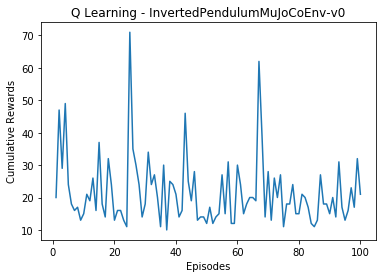

In [88]:
env=gym.make(env2)
episode_rewards = train_dqn_learning(env, DQN_Agent(env, bining_array), n_episodes, max_steps, batch_size)
print(episode_rewards)
plot("Q Learning - InvertedPendulumMuJoCoEnv-v0",episode_rewards)


WalkerBase::__init__
options= 
Episode 0: -299.42487368764307
Episode 1: -348.7476310546574
Episode 2: -305.89875555368684
Episode 3: -271.15038742979215
Episode 4: -300.7114124929679
Episode 5: -300.2475103070532
Episode 6: -274.4992116176987
Episode 7: -324.23808590074174
Episode 8: -306.98269724609173
Episode 9: -317.9995782903659
Episode 10: -299.58146690542134
Episode 11: -281.1547488443825
Episode 12: -287.79385916647834
Episode 13: -269.06300886286823
Episode 14: -319.8563334711812
Episode 15: -306.0333376359879
Episode 16: -290.9608418069214
Episode 17: -277.571912223848
Episode 18: -268.4309775485352
Episode 19: -340.6840334894159
Episode 20: -262.9595425510891
Episode 21: -303.50967203376837
Episode 22: -270.74601830562
Episode 23: -270.58060424013325
Episode 24: -293.3155901440059
Episode 25: -296.6762070235165
Episode 26: -305.25375558006886
Episode 27: -266.54713671195714
Episode 28: -296.6835684058662
Episode 29: -293.16509923780956
Episode 30: -309.3358906540245
Episode 

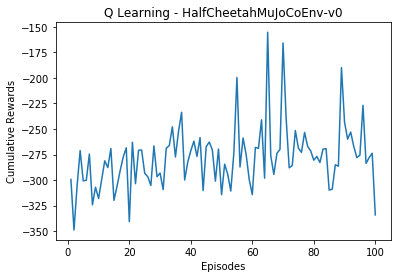

In [89]:
env=gym.make(env3)
episode_rewards = train_dqn_learning(env, DQN_Agent(env, bining_array), n_episodes, max_steps, batch_size)
print(episode_rewards)
plot("Q Learning - HalfCheetahMuJoCoEnv-v0",episode_rewards)


# Sarsa

In [0]:
class Sarsa_Learning_Agent:

    def __init__(self, env, bin_array, learning_rate=3e-4, gamma=0.99):
        self.env = env
        self.bin_array = bin_array
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.discretization = {}

        self.flag_discrete = not isinstance(env.action_space, gym.spaces.discrete.Discrete)  #Checking for discretization based on the flag
        if self.flag_discrete:
            num_actions = env.action_space.sample().shape[0]
        else:
            num_actions = env.action_space.n
        tmp1_list = [[*x] for x in list(itertools.product(*[list(range(len(self.bin_array) - 1)) for x in range(num_actions)]))]
        for i in range(len(tmp1_list)):
            self.discretization[i] = tmp1_list[i]

        if isinstance(env.action_space.sample(), int):
            self.model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
        else:
            self.model = initNeuralNetwork(env.observation_space.sample().shape,
                             int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))

        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.L1_loss = nn.L1Loss()

    def get_action(self, state, discretize=False, eps=0.20):
        state = torch.FloatTensor(state.reshape(-1)).float().unsqueeze(0)
        qvals = self.model.forward(state)
        action = np.argmax(qvals.cpu().detach().numpy())

        if (np.random.randn() < eps):
            tmp_action = self.env.action_space.sample()
            if discretize:
                tmp_action = np.digitize(tmp_action, self.bin_array) - 1

            return tmp_action

        if discretize:
            action = np.array(self.discretization[action])

        return action

    def compute_loss(self, batch):
        states, actions, rewards, next_states, dones = batch
        states = torch.FloatTensor(states.reshape(-1))
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        curr_Q = self.model.forward(states)[actions]
        next_Q = self.model.forward(next_states.reshape(-1))
        expected_Q = rewards + self.gamma * next_Q

        loss = self.L1_loss(curr_Q, expected_Q)
        return loss

    def update(self, batch):
        loss = self.compute_loss(batch)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


In [0]:
def train_sarsa_learning(env, class_sarsa_learning,n_episodes, max_steps):
    episode_rewards = []
    discrete_flag = not isinstance(env.action_space, gym.spaces.discrete.Discrete)
    for episode in range(n_episodes):
        state = env.reset()
        episode_cumulative_reward = 0
        for step in range(max_steps):
            action = class_sarsa_learning.get_action(state, discretize=discrete_flag)
            if discrete_flag:
                analog_action = []
                for bin in action:
                    analog_action.append(np.random.uniform(bining_array[bin],bining_array[bin+1],1))
                analog_action = [x[0] for x in analog_action]
                next_state, reward, done, _ = env.step(analog_action)
                action_next_state = class_sarsa_learning.get_action(next_state, discretize=discrete_flag)
                class_sarsa_learning.update((state, action_next_state[0], [reward], next_state, done))
            else:
                next_state, reward, done, _ = env.step(action)
                action_next_state = class_sarsa_learning.get_action(next_state, discretize=discrete_flag)
                class_sarsa_learning.update((state, action_next_state, [reward], next_state, done))
            episode_cumulative_reward += reward

            if done or step == max_steps-1:
                episode_rewards.append(episode_cumulative_reward)
                print("Episode " + str(episode) + ": " + str(episode_cumulative_reward))
                break

            state = next_state

    return episode_rewards


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Episode 0: 5.0
Episode 1: 0.0
Episode 2: 0.0
Episode 3: 4.0
Episode 4: 2.0
Episode 5: 4.0
Episode 6: 2.0
Episode 7: 5.0
Episode 8: 3.0
Episode 9: 1.0
Episode 10: 0.0
Episode 11: 3.0
Episode 12: 0.0
Episode 13: 3.0
Episode 14: 2.0
Episode 15: 0.0
Episode 16: 0.0
Episode 17: 0.0
Episode 18: 3.0
Episode 19: 2.0
Episode 20: 0.0
Episode 21: 0.0
Episode 22: 0.0
Episode 23: 1.0
Episode 24: 6.0
Episode 25: 3.0
Episode 26: 0.0
Episode 27: 3.0
Episode 28: 0.0
Episode 29: 0.0
Episode 30: 0.0
Episode 31: 1.0
Episode 32: 0.0
Episode 33: 0.0
Episode 34: 1.0
Episode 35: 1.0
Episode 36: 2.0
Episode 37: 0.0
Episode 38: 2.0
Episode 39: 0.0
Episode 40: 2.0
Episode 41: 0.0
Episode 42: 1.0
Episode 43: 1.0
Episode 44: 3.0
Episode 45: 1.0
Episode 46: 2.0
Episode 47: 1.0
Episode 48: 0.0
Episode 49: 3.0
Episode 50: 2.0
Episode 51: 0.0
Episode 52: 2.0
Episode 53: 3.0
Episode 54: 1.0
Episode 55: 4.0
Episode 56: 1.0
Episode 57: 1.0
Episode 58: 1.0
Episode 59: 3.0
Episode 60: 1.0
Episode 61: 2.0
Episode 62: 3.0
Ep

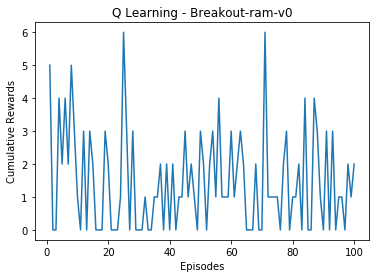

In [94]:
env=gym.make(env1)
episode_rewards = train_sarsa_learning(env, Sarsa_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - Breakout-ram-v0",episode_rewards)

options= 
Episode 0: 18.0
Episode 1: 19.0


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Episode 2: 29.0
Episode 3: 14.0
Episode 4: 18.0
Episode 5: 21.0
Episode 6: 34.0
Episode 7: 12.0
Episode 8: 20.0
Episode 9: 27.0
Episode 10: 25.0
Episode 11: 19.0
Episode 12: 46.0
Episode 13: 47.0
Episode 14: 21.0
Episode 15: 15.0
Episode 16: 26.0
Episode 17: 17.0
Episode 18: 18.0
Episode 19: 31.0
Episode 20: 35.0
Episode 21: 13.0
Episode 22: 54.0
Episode 23: 64.0
Episode 24: 21.0
Episode 25: 36.0
Episode 26: 23.0
Episode 27: 22.0
Episode 28: 31.0
Episode 29: 26.0
Episode 30: 19.0
Episode 31: 24.0
Episode 32: 21.0
Episode 33: 24.0
Episode 34: 17.0
Episode 35: 36.0
Episode 36: 22.0
Episode 37: 21.0
Episode 38: 16.0
Episode 39: 44.0
Episode 40: 16.0
Episode 41: 24.0
Episode 42: 27.0
Episode 43: 14.0
Episode 44: 16.0
Episode 45: 33.0
Episode 46: 57.0
Episode 47: 23.0
Episode 48: 20.0
Episode 49: 18.0
Episode 50: 28.0
Episode 51: 21.0
Episode 52: 30.0
Episode 53: 33.0
Episode 54: 16.0
Episode 55: 18.0
Episode 56: 19.0
Episode 57: 13.0
Episode 58: 18.0
Episode 59: 51.0
Episode 60: 19.0
Episo

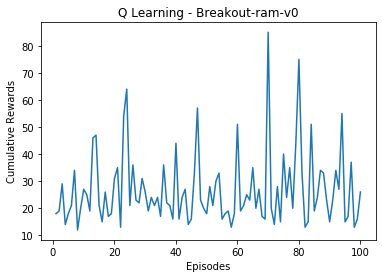

In [99]:
env=gym.make(env2)
episode_rewards = train_sarsa_learning(env, Sarsa_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - Breakout-ram-v0",episode_rewards)

WalkerBase::__init__
options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Episode 0: -199.26442158065882
Episode 1: -292.6814853367592
Episode 2: -263.68488580721714
Episode 3: -287.0905359565117
Episode 4: -314.71127380227915
Episode 5: -238.27850803055475
Episode 6: -241.24842743935076
Episode 7: -256.2213512637517
Episode 8: -255.90438457925117
Episode 9: -334.34960495527736
Episode 10: -312.1098836224797
Episode 11: -298.1009985290911
Episode 12: -226.83974210925595
Episode 13: -263.21528911735464
Episode 14: -284.9444746295498
Episode 15: -282.4024860777024
Episode 16: -212.07693144148374
Episode 17: -308.86854503726966
Episode 18: -283.5945164802267
Episode 19: -214.24799830817219
Episode 20: -279.67397944928905
Episode 21: -325.2057806787475
Episode 22: -287.32179378996597
Episode 23: -223.78756467291447
Episode 24: -265.11138465552176
Episode 25: -173.03022015513977
Episode 26: -293.0949507002764
Episode 27: -338.70391927070585
Episode 28: -317.92839652358157
Episode 29: -256.9439924716199
Episode 30: -288.3632227206996
Episode 31: -283.7148354765707

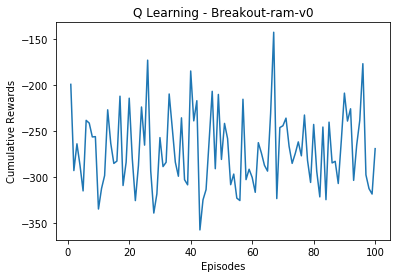

In [100]:
env=gym.make(env3)
episode_rewards = train_sarsa_learning(env, Sarsa_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - Breakout-ram-v0",episode_rewards)

## Policy Evaluation

# Q Learning

In [0]:
def test_q_learning(env, class_q_learning,n_episodes, max_steps):
    episode_rewards = 0
    discrete_flag = not isinstance(env.action_space, gym.spaces.discrete.Discrete)
    for iter in range(10):
        state = env.reset()
        episode_cumulative_reward = 0
        for step in range(max_steps):
            action = class_q_learning.get_action(state, discretize=discrete_flag)
            if discrete_flag:
                analog_action = []
                for bin in action:
                    analog_action.append(np.random.uniform(bining_array[bin],bining_array[bin+1],1))
                analog_action = [x[0] for x in analog_action]
                next_state, reward, done, _ = env.step(analog_action)
                class_q_learning.update((state, action[0], [reward], next_state, done))
            else:
                next_state, reward, done, _ = env.step(action)
                
            episode_cumulative_reward += reward

            if done:
                episode_rewards+=episode_cumulative_reward
                
                break

            state = next_state

    return episode_rewards

In [105]:
env=gym.make(env1)
episode_rewards = test_q_learning(env, Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
#plot("Q Learning - Breakout-ram-v0",episode_rewards)

11.0


In [106]:
env=gym.make(env2)
episode_rewards = test_q_learning(env, Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


314.0


In [107]:
env=gym.make(env3)
episode_rewards = test_q_learning(env, Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

WalkerBase::__init__
options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:88: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


-2473.984844660691


# Fitted Q 

In [108]:
env=gym.make(env1)
episode_rewards = test_q_learning(env, Fitted_Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

12.0


In [109]:
env=gym.make(env2)
episode_rewards = test_q_learning(env, Fitted_Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


308.0


In [110]:
env=gym.make(env3)
episode_rewards = test_q_learning(env, Fitted_Q_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

WalkerBase::__init__
options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


-3343.4239060178256


# DQN

In [0]:
def test_dqn_learning(env, class_dqn, n_episodes, max_steps, batch_size):
    episode_rewards = 0
    discretize_flag = not isinstance(env.action_space, gym.spaces.discrete.Discrete)
    for iter in range(10):
        state = env.reset()
        episode_reward = 0
        while True:
            action = class_dqn.get_action(state, discretize=discretize_flag)

            if discretize_flag:
                analog_action = []
                for bin in action:
                    analog_action.append(np.random.uniform(bining_array[bin],bining_array[bin+1],1))

                analog_action = [x[0] for x in analog_action]
                next_state, reward, done, _ = env.step(analog_action)
                
            else:
                next_state, reward, done, _ = env.step(action)
                
            episode_reward += reward

            if len(class_dqn.replay_buffer) > batch_size:
                class_dqn.update(batch_size)

            if done:
                episode_rewards+=episode_reward
                
                break

            state = next_state
  

    return episode_rewards


In [119]:
env=gym.make(env1)
episode_rewards = test_dqn_learning(env, DQN_Agent(env, bining_array), n_episodes, max_steps,batch_size)
print(episode_rewards)

9.0


In [120]:
env=gym.make(env2)
episode_rewards = test_dqn_learning(env, DQN_Agent(env, bining_array), n_episodes, max_steps,batch_size)
print(episode_rewards)

options= 
199.0


In [121]:
env=gym.make(env3)
episode_rewards = test_dqn_learning(env, DQN_Agent(env, bining_array), n_episodes, max_steps, batch_size)
print(episode_rewards)

WalkerBase::__init__
options= 
-2652.51497109331


# Sarsa

In [0]:
def test_sarsa_learning(env, class_sarsa_learning,n_episodes, max_steps):
    episode_rewards = 0
    discrete_flag = not isinstance(env.action_space, gym.spaces.discrete.Discrete)
    for iter in range(10):
        state = env.reset()
        episode_cumulative_reward = 0
        while True:
            action = class_sarsa_learning.get_action(state, discretize=discrete_flag)
            if discrete_flag:
                analog_action = []
                for bin in action:
                    analog_action.append(np.random.uniform(bining_array[bin],bining_array[bin+1],1))
                analog_action = [x[0] for x in analog_action]
                next_state, reward, done, _ = env.step(analog_action)
                action_next_state = class_sarsa_learning.get_action(next_state, discretize=discrete_flag)
            
            else:
                next_state, reward, done, _ = env.step(action)
                action_next_state = class_sarsa_learning.get_action(next_state, discretize=discrete_flag)
               
            episode_cumulative_reward += reward

            if done:
                episode_rewards+=episode_cumulative_reward
                
                break

            state = next_state

    return episode_rewards


In [125]:
env=gym.make(env1)
episode_rewards = test_sarsa_learning(env, Sarsa_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

17.0


In [126]:
env=gym.make(env2)
episode_rewards = test_sarsa_learning(env, Sarsa_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

options= 
232.0


In [127]:
env=gym.make(env3)
episode_rewards = test_sarsa_learning(env, Sarsa_Learning_Agent(env, bining_array), n_episodes, max_steps)
print(episode_rewards)

WalkerBase::__init__
options= 
-2380.0323326539


#Random Policy

#Fitted Q Learning

Here comparison between the use of epsilon-greedy vs. random behavior policy is being performed for half cheetah environment and using fitted Q iteration as RL algorithm.
When an action is selected in training, it is either chosen as the action with the highest q-value, or a random action. Choosing between these two is random and based on the value of epsilon, and epsilon is annealed during training such that initially, lots of random actions are taken (exploration), but as training progresses, lots of actions with the maximum q-values are taken (exploitation).
We can also perform a training based on some random value instead of epsilon and thus can evaluate a random policy continually to calculate its value functions. A random policy is simply a policy that take any possible action randomly. Here, for getting action, it is done by comparing with some random number generated instead of epsilon.

In [0]:
class Fitted_Q_Learning_Agent_Random:

    def __init__(self, env, bin_array, learning_rate=3e-4, gamma=0.99):
        self.env = env
        self.bin_array = bin_array
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.discretization = {}

        self.flag_discrete = not isinstance(env.action_space, gym.spaces.discrete.Discrete)  #Checking for discretization based on the flag
        if self.flag_discrete:
            num_actions = env.action_space.sample().shape[0]
        else:
            num_actions = env.action_space.n
        tmp1_list = [[*x] for x in list(itertools.product(*[list(range(len(self.bin_array) - 1)) for x in range(num_actions)]))]
        for i in range(len(tmp1_list)):
            self.discretization[i] = tmp1_list[i]

        if isinstance(env.action_space.sample(), int):
            self.model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
        else:
            self.model = initNeuralNetwork(env.observation_space.sample().shape,
                             int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))

        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.MSE_loss = nn.MSELoss()

    def get_action(self, state, discretize=False, eps=1.0): #Random Policy implementation i.e. eps =1.0 (to generate a random number from 0 to 1 for random policy)
        state = torch.FloatTensor(state.reshape(-1)).float().unsqueeze(0)
        qvals = self.model.forward(state)
        action = np.argmax(qvals.cpu().detach().numpy())

        if (np.random.randn() < eps):
            tmp_action = self.env.action_space.sample()
            if discretize:
                tmp_action = np.digitize(tmp_action, self.bin_array) - 1

            return tmp_action

        if discretize:
            action = np.array(self.discretization[action])

        return action

    def compute_loss(self, batch):
        states, actions, rewards, next_states, dones = batch
        states = torch.FloatTensor(states.reshape(-1))
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        curr_Q = self.model.forward(states)[actions]
        next_Q = self.model.forward(next_states.reshape(-1))
        max_next_Q = torch.max(next_Q)
        expected_Q = rewards + self.gamma * max_next_Q

        loss = 0.5 * self.MSE_loss(curr_Q, expected_Q) #Fitted Q Learning 
        return loss

    def update(self, batch):  #updating Q value based on the loss obtained from the next state and action
        loss = self.compute_loss(batch)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


WalkerBase::__init__
options= 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Episode 0: -249.52297394633527
Episode 1: -261.4617215618174
Episode 2: -337.9223415067978
Episode 3: -237.14924402376695
Episode 4: -280.84739842873915
Episode 5: -246.16710589132384
Episode 6: -267.40057831049415
Episode 7: -282.59793237048757
Episode 8: -312.1791365958225
Episode 9: -247.82298192041344
Episode 10: -222.7021520655705
Episode 11: -231.33809886281486
Episode 12: -232.30417054907585
Episode 13: -262.74603005579496
Episode 14: -229.3372225631406
Episode 15: -192.30147521009982
Episode 16: -193.31630194290014
Episode 17: -209.25772490255164
Episode 18: -209.69657859404956
Episode 19: -238.22663899558495
Episode 20: -201.43549878517982
Episode 21: -199.95164756125936
Episode 22: -217.8763918897228
Episode 23: -203.22852348018003
Episode 24: -208.17432136690093
Episode 25: -341.58198571451663
Episode 26: -241.79109547622355
Episode 27: -345.33594363957997
Episode 28: -275.2097353477926
Episode 29: -242.8873868565874
Episode 30: -277.65416590321945
Episode 31: -322.446551509

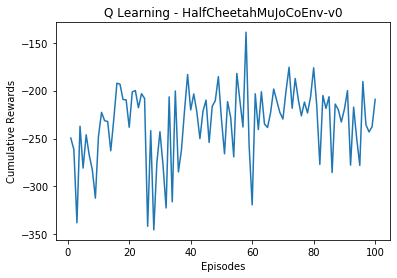

In [130]:
# Random Policy on Half Cheetah environment
env=gym.make(env3)
episode_rewards = train_q_learning(env, Fitted_Q_Learning_Agent_Random(env, bining_array), n_episodes, max_steps)
print(episode_rewards)
plot("Q Learning - HalfCheetahMuJoCoEnv-v0",episode_rewards)